**A CLASSIFICATION MODEL FOR THE KR VARIETIES AT NATIONAL COFFEE RESEARCH INSTITUTE**
The National Coffee Research is one of the Public Agricultural Institutions under the National aGRICULTURAL rESEARCH oRGANIZATION (NARO).
In order to improve coffee agricultural chain, the developed 10 KR varieties that are resistant to Coffee wilt diseases and are high yielding. However, the identification of these varieties is a complex process that requires expertise. The institute would like to develop smarter and more accurate meana of classifying and distinquishing these varieties in the nursery establishment so that farmers and Nursery operators grow them with certainity and as a result improve on yields. This wor is the first attempt at developing a machine learning model that can be used to classify each of these varieties.

**Confirming the Directory***

In [3]:
pwd


'C:\\Users\\APRI'

**Importing initial Dependencies**

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

**Reading in image Data**

In [7]:
kr7 = cv2.imread('data/test/kr7/0.jpg')


**Converting from BGR to RGB color space**

In [9]:
kr7 = cv2.cvtColor(kr7,cv2.COLOR_BGR2RGB)

**Image Visualization/Plotting**

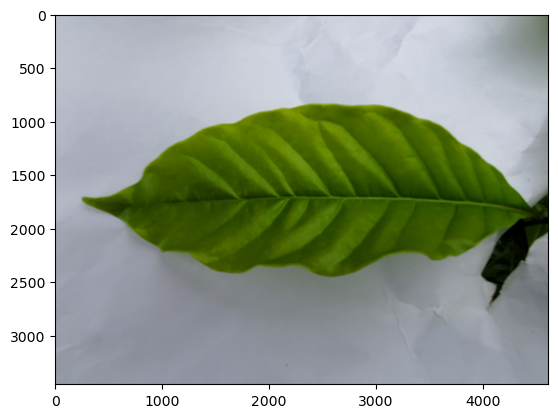

In [11]:
plt.imshow(kr7)

**Discovering the shape of a single data file**

In [13]:
kr7.shape

(3456, 4608, 3)

In [15]:
kr3 = cv2.imread('data/test/kr3/0.jpg')

In [17]:
kr3 = cv2.cvtColor(kr3,cv2.COLOR_BGR2RGB)

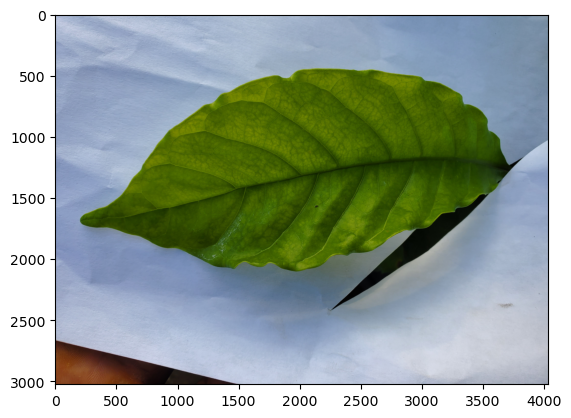

In [19]:
plt.imshow(kr3)

In [27]:
kr9 = cv2.imread('data/train/kr9/3.jpg')

In [29]:
kr9 = cv2.cvtColor(kr9,cv2.COLOR_BGR2RGB)

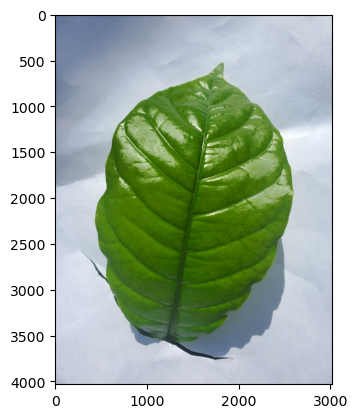

In [31]:
plt.imshow(kr9)

In [357]:
kr9.shape

(4032, 3024, 3)

In [38]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [244]:
image_gen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,  
    rescale=1./255,                        
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,)


In [246]:
transformed_image = image_gen.random_transform(kr9)


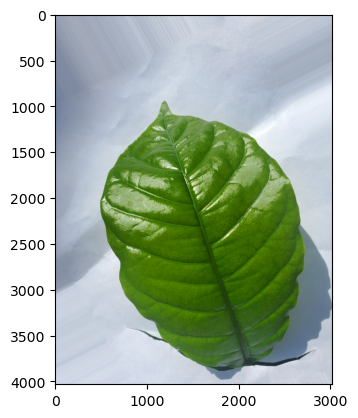

In [248]:
plt.imshow(transformed_image)

In [411]:
image_gen.flow_from_directory('data/train',target_size=(1000,1000),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,)

Found 120 images belonging to 5 classes.


In [391]:
image_gen.flow_from_directory('data/test')

Found 30 images belonging to 5 classes.


In [393]:
from keras.models import Sequential

In [395]:
from keras.layers import Activation, Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [413]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(1000,1000,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.50))

model.add(Dense(5))
model.add(Activation('softmax'))
          
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])





In [415]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 997, 997, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 498, 498, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 495, 495, 64)        │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 247, 247, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 244, 244, 64)        │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 119, 119, 64)        │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 56, 56, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,077,797 (49.89 MB)

 Trainable params: 13,077,797 (49.89 MB)

 Non-trainable params: 0 (0.00 B)

In [427]:
train_image_gen = ImageDataGenerator(rescale=1/255)
test_image_gen = ImageDataGenerator(rescale=1/255)

In [431]:
train_image_gen = image_gen.flow_from_directory('data/train',
                                               target_size=(1000,1000),
                                               batch_size=8,
                                                class_mode='categorical')



Found 120 images belonging to 5 classes.


In [433]:
test_image_gen = image_gen.flow_from_directory('data/test',
                                               target_size=(1000,1000),
                                               batch_size=8,
                                                class_mode='categorical')

Found 30 images belonging to 5 classes.


In [435]:
train_image_gen.class_indices

{'kr3': 0, 'kr5': 1, 'kr6': 2, 'kr7': 3, 'kr9': 4}

In [437]:
test_image_gen.class_indices

{'kr3': 0, 'kr5': 1, 'kr6': 2, 'kr7': 3, 'kr9': 4}

In [441]:
results = model.fit(train_image_gen,
    batch_size=8,
    epochs=10,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,    
    validation_data = test_image_gen,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1) 

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.2392 - loss: 1.6414 - val_accuracy: 0.2000 - val_loss: 1.6128
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.1564 - loss: 1.6400 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.2791 - loss: 1.6121 - val_accuracy: 0.2000 - val_loss: 1.6167
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.1894 - loss: 1.6635 - val_accuracy: 0.2000 - val_loss: 1.6099
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.2249 - loss: 1.9681 - val_accuracy: 0.2000 - val_loss: 1.6091
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.2078 - loss: 1.6150 - val_accuracy: 0.2000 - val_loss: 1.6122
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.2425 - loss: 1.6117 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.1586 - loss: 1.6212 - val_accuracy: 0.1000 - val_loss:

In [443]:
model.metrics_names

['loss', 'compile_metrics']

In [449]:
results.history['accuracy']

[0.20000000298023224,
 0.17499999701976776,
 0.25833332538604736,
 0.1666666716337204,
 0.17499999701976776,
 0.21666666865348816,
 0.22499999403953552,
 0.15833333134651184,
 0.20000000298023224,
 0.17499999701976776]

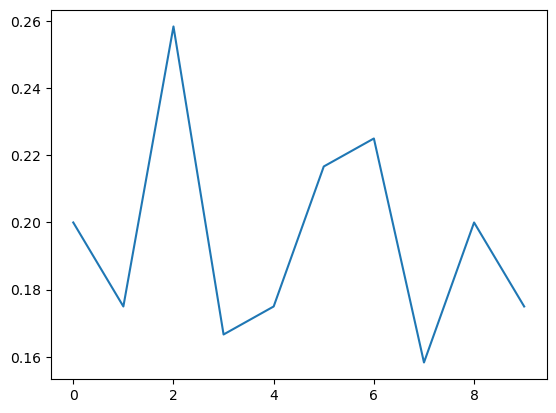

In [451]:
plt.plot(results.history['accuracy'])

**Predicting on new images**

In [454]:
train_image_gen.class_indices

{'kr3': 0, 'kr5': 1, 'kr6': 2, 'kr7': 3, 'kr9': 4}

In [456]:
#how to load a model in keras
#from keras.models import load_model
#new_model = load_model('the model name)

In [458]:
kr_test  = 'data/test/kr5/2.jpg'

In [460]:
from keras.preprocessing import image

In [462]:
kr5_image = image.load_img(kr_test,target_size=(1000,1000))

In [464]:
kr5_image = image.img_to_array(kr5_image)

In [466]:
kr5_image.shape

(1000, 1000, 3)

In [470]:
import numpy as np
kr5_image = np.expand_dims(kr5_image,axis=0)

In [472]:
kr5_image.shape

(1, 1000, 1000, 3)

In [474]:
kr5_image = kr5_image/255

In [478]:
model.predict(kr5_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


array([[0.199355  , 0.19883612, 0.19938643, 0.20107237, 0.20134999]],
      dtype=float32)

In [493]:
model.save('krpredictionmodel.h5')

In [497]:
model.save('krpredictionmodel1.keras')